## Shell Contact Example

In [1]:
# !pip install debugpy

In [2]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.001)

material = dismech.Material(density=2000,
                            youngs_rod=0,
                            youngs_shell=5e8,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=True,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-3,
                                  max_iter=120,
                                  total_time=2,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
# env.add_force('floorContact', ground_z=-1e-3, stiffness=20, delta=1e-4, h=1e-3)
env.add_force('selfContact', delta=1e-4, h=1e-3, kc=10)
env.add_force('damping', eta = 0.1)
#env.set_static()   

# geo = dismech.Geometry.from_txt('2random_mesh_20.txt')
# geo = dismech.Geometry.from_txt('2random_mesh_8.txt')
# geo = dismech.Geometry.from_txt('input_shell_for_self_contact.txt')
geo = dismech.Geometry.from_txt('input_shell_more_curved_rand20_scaled.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

# fixed_points = np.array(np.where(
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] <= 0.01) &
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] == 0.0)
# )[0])
fixed_points = np.array(np.where(
    (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001) # (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001)
)[0])

# fixed_points = np.array(np.where(
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] <= 0.455) & 
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] >= 0.445) # (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001)
# )[0])


robot = robot.fix_nodes(fixed_points)

# u = robot.state.u
# u[11] = -0.5
# u[14] = -0.5
# u[17] = -0.5

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [3]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

delta: 0.1
h: 1.0
K1: 150.0
scale:  1000.0
kc:  10
upper limit for quadratic: 1.9
upper limit for smooth: 2.1
0.2972994640468692
0.0009613340984243817
current_time:  0.001
0.5737529907861557
0.0032224767307834543
current_time:  0.002
0.8395229397190128
0.00646064574768379
current_time:  0.003
1.0944516459041755
0.01093748062217995
current_time:  0.004
1.3401247309172397
0.016461395055760424
current_time:  0.005
1.5774292556136678
0.022386455167982527
current_time:  0.006
1.8068355788843349
0.02874098831675942
current_time:  0.007
2.0287164600837904
0.036526334267298476
current_time:  0.008
2.24339914838312
0.04655552265064621
current_time:  0.009000000000000001
2.451114958183284
0.05844081235383801
current_time:  0.01
2.651991982946711
0.07089214733624333
current_time:  0.011
2.8461113600130235
0.0824965888999601
current_time:  0.012
3.033575215921997
0.09222680514522533
current_time:  0.013000000000000001
3.2145413729813312
0.0996421877679489
current_time:  0.014
3.389218570030518
0.1

In [4]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2p', plot_step=20)

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

101


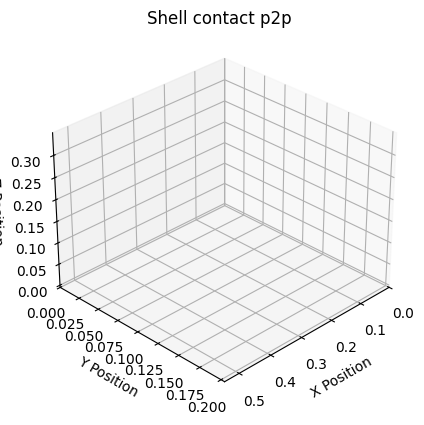

In [5]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('selfcontact_final.gif')